# ANALISIS FORECAST - Sesión 02

- Expositor: César Manuel Quezada Balcazar
- Email: cesar.quezada@dmc.pe
- LinkedIn: www.linkedin.com/in/quezada7ba19382
- Tema: Análisis - Series de Tiempo

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/DMC/Forecast/'

**Importamos los módulos necesarios**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

**Leemos nuestra serie de tiempo desde un archvo csv**

Cantidad de pasajeros de una aerolinea a traves de los años

In [4]:
# Importar datos en formato csv.
pasajeros = pd.read_csv(path + 'pasajeros.csv',encoding='latin-1', sep = ';',parse_dates = ['fecha'], dayfirst = True) # a veces los datos no se cargan bien

In [5]:
pasajeros.head(3)

,Unnamed: 0,x,fecha
0,1,112,1949-01-01
1,2,118,1949-02-01
2,3,132,1949-03-01


In [6]:
pasajeros.dtypes

Unnamed: 0             int64
x                      int64
fecha         datetime64[ns]
dtype: object

In [7]:
# Asignando fecha como index
pasajeros.set_index('fecha',inplace = True)

In [8]:
pasajeros.head(5)

,Unnamed: 0,x
fecha,,
1949-01-01,1,112
1949-02-01,2,118
1949-03-01,3,132
1949-04-01,4,129
1949-05-01,5,121


**Graficamos la serie de tiempo**

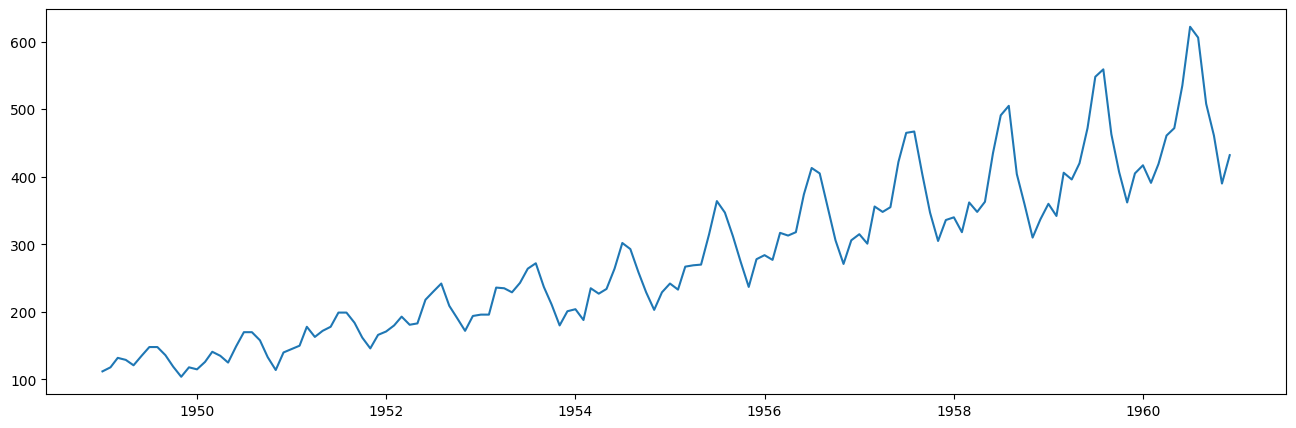

In [9]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(pasajeros.x,color='tab:blue')
plt.show()

# **DESCOMPOSICIÓN DE UNA SERIE DE TIEMPO**

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

**Métodos de Descomposición**

In [11]:
# Multiplicative Decomposition
#=============================
result_mul = seasonal_decompose(pasajeros['x'],model = 'multiplicative',period = 12)
# Additive Decomposition
#=============================
result_add = seasonal_decompose(pasajeros['x'],model = 'additive',period = 12)

## **Graficamos las componentes por método**

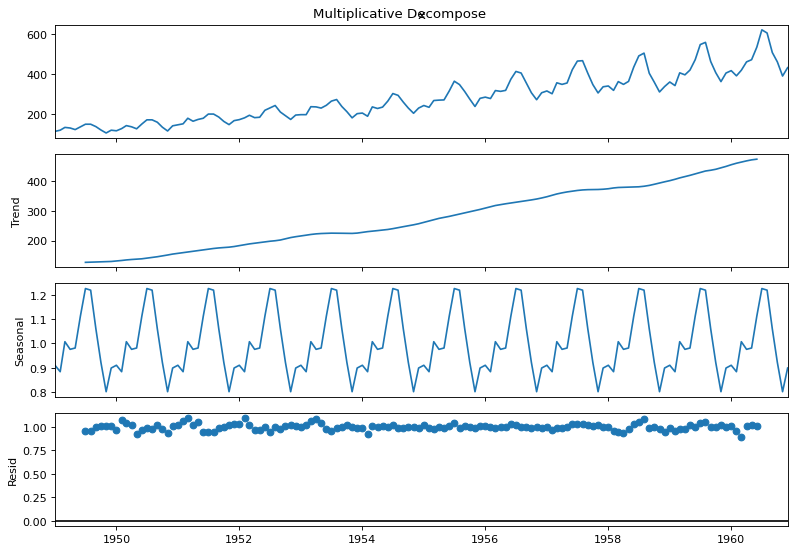

In [12]:
# Descoposicion Multiplicativa
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 80})
result_mul.plot().suptitle('Multiplicative Decompose',fontsize = 12)
plt.show()

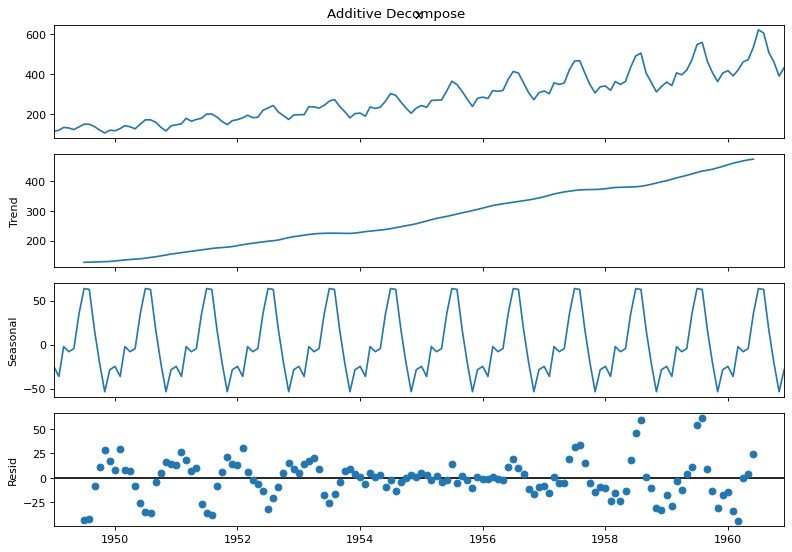

In [14]:
# Descoposicion Aditiva
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 80})
result_add.plot().suptitle('Additive Decompose',fontsize = 12)
plt.show()

**Extraemos los resultados de la descomposición en un marco de datos**

In [15]:
# guardando en DataFrame nuestro set de datos
df_reconstructed = pd.concat([result_mul.seasonal,result_mul.trend,result_mul.resid,result_mul.observed],axis = 1)
df_reconstructed.columns = ['estacion','tendencia','residuales','observaciones']
df_reconstructed.head(20)

,estacion,tendencia,residuales,observaciones
fecha,,,,
1949-01-01,0.910230,NaN,NaN,112.0
1949-02-01,0.883625,NaN,NaN,118.0
1949-03-01,1.007366,NaN,NaN,132.0
1949-04-01,0.975906,NaN,NaN,129.0
1949-05-01,0.981378,NaN,NaN,121.0
1949-06-01,1.112776,NaN,NaN,135.0
1949-07-01,1.226556,126.791667,0.951664,148.0
1949-08-01,1.219911,127.250000,0.953401,148.0
1949-09-01,1.060492,127.958333,1.002220,136.0


Notamos que tendencia y residuales tienen un desface debido a que la tendencia hace sumas ponderadas y genera promedios*

## Analisis de residuales

In [16]:
# analisis de residuales
import scipy.stats as stats
import pylab

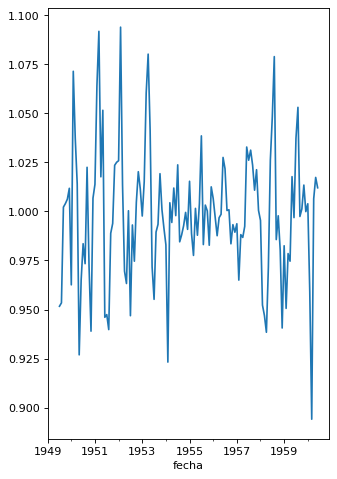

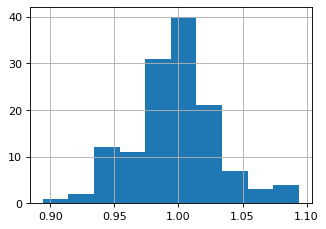

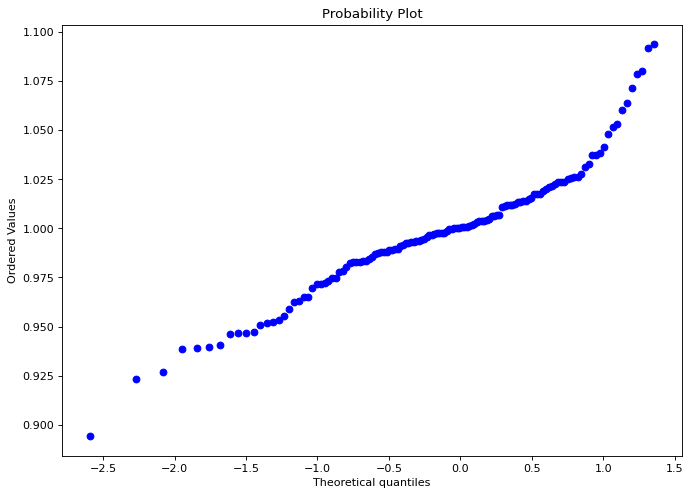

In [17]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 80})

plt.subplot(1,2,1)

plt.subplot(1,2,1)
df_reconstructed.residuales.plot()
plt.show()

plt.subplot(2,2,1)
df_reconstructed.residuales.hist()
plt.show()

plt.subplot(1,1,1)
stats.probplot(df_reconstructed.residuales,dist = 'norm', plot = pylab)
plt.show()

### Test de normalidad

**Test de kolmogorov smirnov:**
El pvalue < 0.05 para determinar normalidad en los residuos

In [18]:
# Test de normalidad
stats.kstest(df_reconstructed.residuales.dropna(),'norm')

KstestResult(statistic=0.8144735700478394, pvalue=4.561319331391137e-96, statistic_location=0.9232031554773301, statistic_sign=-1)

In [19]:
# pvalue < 0.05 ==> normalidad en los residuos

# **SERIES TEMPORALES ESTACIONARIAS Y NO ESTACIONARIAS**

Existen múltiples implementaciones de pruebas de Unit Root como:

- Prueba Dickey Fuller aumentada (prueba ADH)
- Kwiatkowski-Phillips-Schmidt-Shin - Prueba KPSS (tendencia estacionaria)
- Prueba de Philips Perron (prueba de PP)
- La más utilizada es la prueba ADF, donde la hipótesis nula es que la serie temporal posee una raíz unitaria y no es estacionaria. Entonces, si el valor P en la prueba ADH es menor que el nivel de significancia (0.05), rechaza la hipótesis nula.
- La prueba KPSS, por otro lado, se usa para probar la estacionariedad de tendencia. La hipótesis nula y la interpretación del valor P es justo lo contrario de la prueba ADH

**Test de Raices Unitarias**

In [20]:
from statsmodels.tsa.stattools import adfuller, kpss

In [28]:
# ADF Test  (pvalue < 0.05 ==> Es estacionaria)
result = adfuller(pasajeros.x)
result[1]

0.991880243437641

In [29]:
# KPSS Test (pvalue > 0.05 ==> Es estacionaria )
result_kp = kpss(pasajeros.x.values)
result_kp[1]

<ipython-input-29-72967d36b314>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kp = kpss(pasajeros.x.values)


0.01

In [26]:
# Para ambos casos se rechazara la H0 ==> No cumple la estacionalidad

**ELIMINANDO COMPONENTES DE LA SERIE DE TIEMPO**

*Retirando la estación*

In [30]:
Tendencia_pasajeros = np.log(df_reconstructed.observaciones)

In [31]:
Tendencia_pasajeros.head()

fecha
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: observaciones, dtype: float64

In [32]:
# Se le quita el efecto del incremento

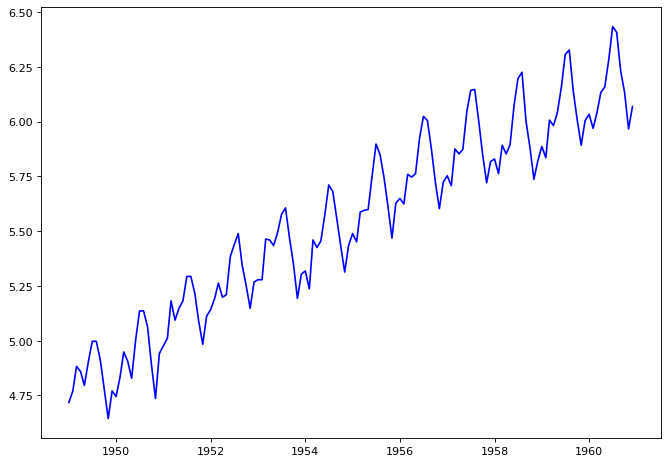

In [33]:
plt.plot(Tendencia_pasajeros,color = 'blue')

*Retirando la tendencia*

In [34]:
data_pasajeros = Tendencia_pasajeros.diff().dropna()

In [36]:
data_pasajeros.head()

fecha
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
Name: observaciones, dtype: float64

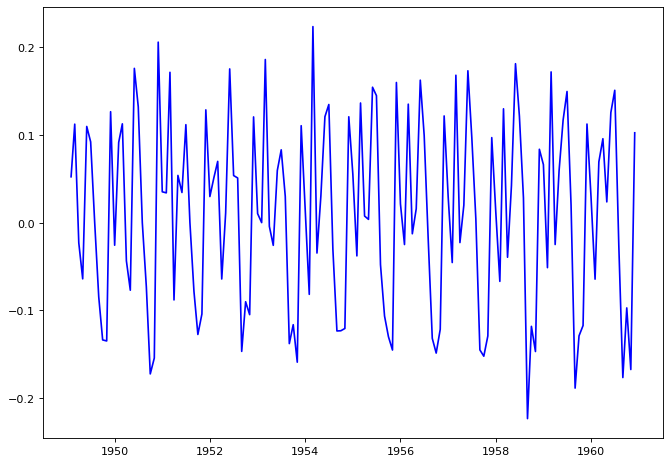

In [35]:
plt.plot(data_pasajeros,color = 'blue')

## Volvemos a probar el test

In [37]:
# ADF Test (pvalue < 0.05 ==> Es estacionaria)
result = adfuller(data_pasajeros)
print('p_value:',result[1])

p_value: 0.07112054815086184


In [ ]:
result

(-2.717130598388114,
 0.07112054815086184,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

In [ ]:
# No cumople el test de estacionalidad

In [38]:
# KPSS Test (pvalue > 0.05 ==> Es estacionaria )al
result_kp = kpss(data_pasajeros)
print('p_value:',result_kp[1])

p_value: 0.1


<ipython-input-38-2d5a59b45da2>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kp = kpss(data_pasajeros)


In [39]:
# Si cumple el test de estacionalidad

Podemos ver que esta cumpliendo a nivel de heterocedasticidad pero no a nivel de tendencia en media. Para corregir esto, aplicaremos una segunda diferencia

In [40]:
# aplicando segunda diferencia
data_pasajeros2 = Tendencia_pasajeros.diff(2).dropna()

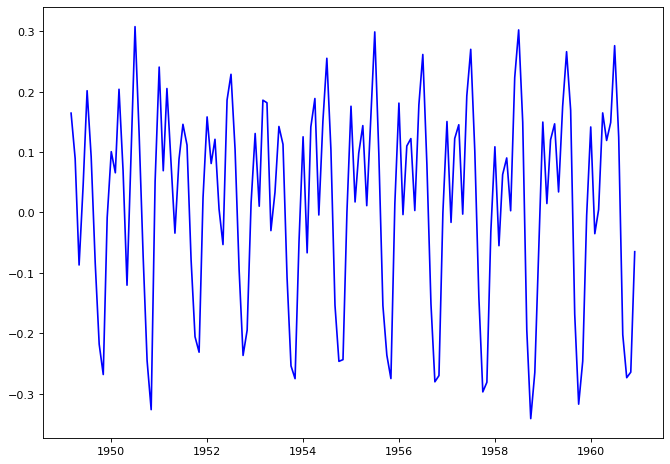

In [41]:
plt.plot(data_pasajeros2,color = 'blue')

In [42]:
# ADF Test (pvalue < 0.05 ==> Es estacionaria)
result = adfuller(data_pasajeros2)
print('p_value:',result[1])

p_value: 0.021919114564039603


In [43]:
# KPSS Test (pvalue > 0.05 ==> Es estacionaria )al
result_kp = kpss(data_pasajeros2)
print('p_value:',result_kp[1])

p_value: 0.1


<ipython-input-43-06477d31486c>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kp = kpss(data_pasajeros2)


In [44]:
# Se consigue la estacionalidad